In [10]:
import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
import keras
from tensorflow.keras.optimizers import Adam, Adagrad, Adamax, RMSprop, SGD, Adadelta
import matplotlib.pyplot as plt
import numpy as np
from keras import layers

In [3]:
dataset, dataset_info = tfds.load('caltech_birds2011', with_info=True, as_supervised=True)
test_set, training_set = dataset['test'], dataset['train']

In [4]:
for i, example in enumerate(training_set.take(3)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (333, 500, 3) label: 1
Image 2 shape: (290, 500, 3) label: 149
Image 3 shape: (500, 402, 3) label: 134


2023-02-26 23:50:50.309340: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.cache().shuffle(1020//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

# validation_batches = validation_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = test_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

In [8]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,input_shape=(IMAGE_RES, IMAGE_RES, 3))
train_batches

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [14]:
# Adam Optimiser for Caltech Birds Dataset

model_adam_caltech = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(200, activation='softmax')
])

model_adam_caltech.summary()

model_adam_caltech.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adam_caltech = model_adam_caltech.fit(train_batches,
                    epochs=30,
                    validation_data=test_batches)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 200)               256200    
                                                                 
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 47s 249ms/step - loss: 3.3545 - accuracy: 0.2784 - val_loss: 2.2546 - val_accuracy: 0.4591
Epoch 2/30
188/188 [==============================] - 48s 255ms/step - loss: 1.4605 - accuracy: 0.6839 - val_loss: 1.8266 - val_accuracy: 0.5350
Epoch 3/30
188/188 [==============================] - 47s 251ms/step - loss: 0.9548 - accuracy: 0.8125 - val_loss: 1.6740 - val_accuracy: 0.5656

In [15]:
# Adadelta Optimizer for Caltech Birds Dataset

model_adadelta_caltech = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(200, activation='softmax')
])

model_adadelta_caltech.summary()

model_adadelta_caltech.compile(optimizer='adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adadelta_caltech = model_adadelta_caltech.fit(train_batches,
                    epochs=30,
                    validation_data=test_batches)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 200)               256200    
                                                                 
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 48s 256ms/step - loss: 5.5595 - accuracy: 0.0033 - val_loss: 5.5493 - val_accuracy: 0.0048
Epoch 2/30
188/188 [==============================] - 50s 267ms/step - loss: 5.5451 - accuracy: 0.0033 - val_loss: 5.5371 - val_accuracy: 0.0052
Epoch 3/30
188/188 [==============================] - 48s 254ms/step - loss: 5.5325 - accuracy: 0.0038 - val_loss: 5.5255 - val_accuracy: 0.0060

In [16]:
# Adagrad Optimizer for Caltech Birds Dataset

model_adagrad_caltech = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(200, activation='softmax')
])

model_adagrad_caltech.summary()

model_adagrad_caltech.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adagrad_caltech = model_adagrad_caltech.fit(train_batches,
                    epochs=30,
                    validation_data=test_batches)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 200)               256200    
                                                                 
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 48s 253ms/step - loss: 5.4544 - accuracy: 0.0063 - val_loss: 5.3220 - val_accuracy: 0.0105
Epoch 2/30
188/188 [==============================] - 47s 250ms/step - loss: 5.2133 - accuracy: 0.0140 - val_loss: 5.1336 - val_accuracy: 0.0219
Epoch 3/30
188/188 [==============================] - 47s 251ms/step - loss: 5.0275 - accuracy: 0.0302 - val_loss: 4.9794 - val_accuracy: 0.0361

In [17]:
# Adamax Optimizer for Caltech Birds Dataset

model_adamax_caltech = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(200, activation='softmax')
])

model_adamax_caltech.summary()

model_adamax_caltech.compile(optimizer='adamax',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adamax_caltech = model_adamax_caltech.fit(train_batches,
                    epochs=30,
                    validation_data=test_batches)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 200)               256200    
                                                                 
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 48s 254ms/step - loss: 4.2738 - accuracy: 0.1485 - val_loss: 3.5274 - val_accuracy: 0.2673
Epoch 2/30
188/188 [==============================] - 47s 248ms/step - loss: 2.9980 - accuracy: 0.4169 - val_loss: 2.9738 - val_accuracy: 0.3754
Epoch 3/30
188/188 [==============================] - 47s 249ms/step - loss: 2.4497 - accuracy: 0.5445 - val_loss: 2.6239 - val_accuracy: 0.4418

In [18]:
# RMSprop Optimizer for Caltech Birds Dataset

model_rms_caltech = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(200, activation='softmax')
])

model_rms_caltech.summary()

model_rms_caltech.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_rms_caltech = model_rms_caltech.fit(train_batches,
                    epochs=30,
                    validation_data=test_batches)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_7 (Dense)             (None, 200)               256200    
                                                                 
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 48s 253ms/step - loss: 3.2377 - accuracy: 0.2951 - val_loss: 2.1528 - val_accuracy: 0.4677
Epoch 2/30
188/188 [==============================] - 47s 253ms/step - loss: 1.4146 - accuracy: 0.6520 - val_loss: 1.7617 - val_accuracy: 0.5314
Epoch 3/30
188/188 [==============================] - 47s 251ms/step - loss: 0.9472 - accuracy: 0.7631 - val_loss: 1.6305 - val_accuracy: 0.5690

In [19]:
# SGD Optimizer for Caltech Birds Dataset

model_sgd_caltech = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(200, activation='softmax')
])

model_sgd_caltech.summary()

model_sgd_caltech.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_sgd_caltech = model_sgd_caltech.fit(train_batches,
                    epochs=30,
                    validation_data=test_batches)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_8 (Dense)             (None, 200)               256200    
                                                                 
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 49s 257ms/step - loss: 5.2081 - accuracy: 0.0167 - val_loss: 4.8599 - val_accuracy: 0.0509
Epoch 2/30
188/188 [==============================] - 47s 253ms/step - loss: 4.5776 - accuracy: 0.1023 - val_loss: 4.3607 - val_accuracy: 0.1458
Epoch 3/30
188/188 [==============================] - 48s 253ms/step - loss: 4.0776 - accuracy: 0.2065 - val_loss: 3.9535 - val_accuracy: 0.2275

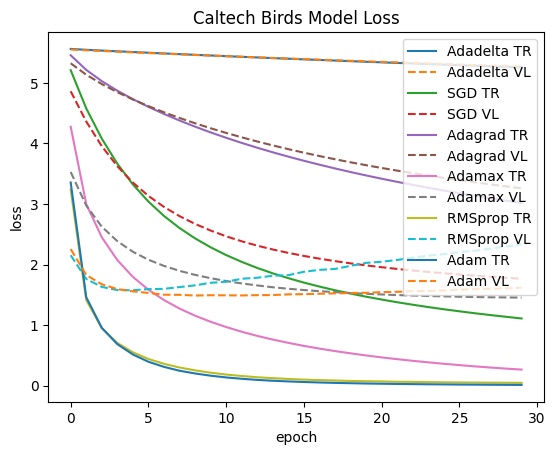

<Figure size 1800x1200 with 0 Axes>

In [22]:
plt.plot(history_adadelta_caltech.history['loss'], label = 'Adadelta TR')
plt.plot(history_adadelta_caltech.history['val_loss'],linestyle="--",label = 'Adadelta VL')

plt.plot(history_sgd_caltech.history['loss'], label = 'SGD TR')
plt.plot(history_sgd_caltech.history['val_loss'], linestyle="--", label = 'SGD VL')

plt.plot(history_adagrad_caltech.history['loss'], label = 'Adagrad TR')
plt.plot(history_adagrad_caltech.history['val_loss'], linestyle="--", label = 'Adagrad VL')

plt.plot(history_adamax_caltech.history['loss'], label = 'Adamax TR')
plt.plot(history_adamax_caltech.history['val_loss'], linestyle="--", label = 'Adamax VL')

plt.plot(history_rms_caltech.history['loss'], label = 'RMSprop TR')
plt.plot(history_rms_caltech.history['val_loss'], linestyle="--",  label = 'RMSprop VL')

plt.plot(history_adam_caltech.history['loss'], label = 'Adam TR')
plt.plot(history_adam_caltech.history['val_loss'], linestyle="--", label ='Adam VL')

plt.title('Caltech Birds Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.figure(figsize=(18, 12))
# plt.savefig('caltech_result.png')
plt.show()

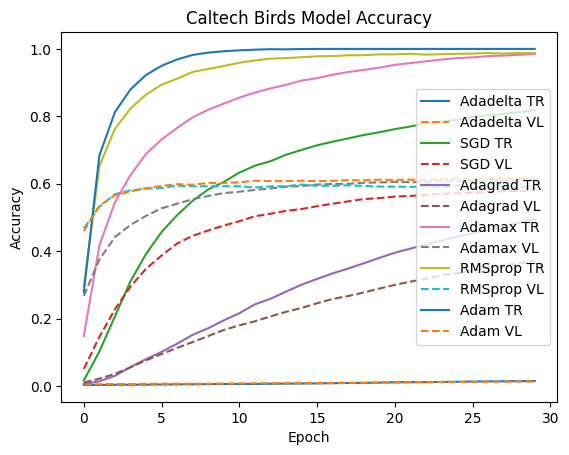

<Figure size 1800x1200 with 0 Axes>

In [23]:
plt.plot(history_adadelta_caltech.history['accuracy'], label = 'Adadelta TR')
plt.plot(history_adadelta_caltech.history['val_accuracy'],linestyle="--",label = 'Adadelta VL')

plt.plot(history_sgd_caltech.history['accuracy'], label = 'SGD TR')
plt.plot(history_sgd_caltech.history['val_accuracy'], linestyle="--", label = 'SGD VL')

plt.plot(history_adagrad_caltech.history['accuracy'], label = 'Adagrad TR')
plt.plot(history_adagrad_caltech.history['val_accuracy'], linestyle="--", label = 'Adagrad VL')

plt.plot(history_adamax_caltech.history['accuracy'], label = 'Adamax TR')
plt.plot(history_adamax_caltech.history['val_accuracy'], linestyle="--", label = 'Adamax VL')

plt.plot(history_rms_caltech.history['accuracy'], label = 'RMSprop TR')
plt.plot(history_rms_caltech.history['val_accuracy'], linestyle="--",  label = 'RMSprop VL')

plt.plot(history_adam_caltech.history['accuracy'], label = 'Adam TR')
plt.plot(history_adam_caltech.history['val_accuracy'], linestyle="--", label ='Adam VL')

plt.title('Caltech Birds Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure(figsize=(18, 12))
# plt.savefig('caltech_result.png')
plt.show()